# Sleep in Adolescents: Association with Social Media, Mental Health and Problem Behaviour

https://skemman.is/bitstream/1946/28393/1/Halld%C3%B3r_Gauti_Bs_.pdf

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show

# Display plots inline in the notebook
%matplotlib inline 

In [2]:
data=pd.DataFrame()

C:\Users\Admin2\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


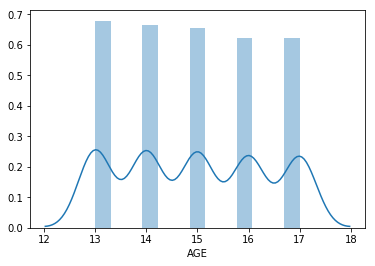

In [3]:
#Age 13-18 15mean
np.random.seed(256) # Set the random seed
data['AGE'] = np.random.randint(13,18, size= 2028,dtype='int')

sns.distplot(data['AGE'])

## Gender

In [4]:
#Gender male= 48.9 female= 51.1
np.random.seed(256) # Set the random seed
gender=['Male','Female']
data['GENDER']= np.random.choice(gender, 2028,p=[0.489,0.511])

data['GENDER'].value_counts()

Female    1031
Male       997
Name: GENDER, dtype: int64

## Social media use
To measure the time spent on social media participants were asked the following question “How much time on average do you spend on the following: Being on social media on the internet for example on Facebook, Twitter, Instagram, Vine, Tumblr,
WhatsApp, Snapchat, Skype” the response to the question ranged from 1 (almost no time) to 8 (6 hours or more). When processing the date a change was made and the responses were combined into three groups; those that answered Almost no time, thirty minutes to an hour and around one hour, were combined and called Little time. Those who answered around two hours and around three hours were combined and called Average time and finally those that answered, around four hours, around five hours and six hours or more were combined and called Long time. This was done on the basis of a study by Mediakix (2017) stating that the
average person spends around 116 minutes a day on social media. 

In [5]:
# Little time 55.5% (1,077) ,Average time 30.4% (589), Long time 14.1% 
np.random.seed(256) # Set the random seed
smedia=['Little Time','Average Time','Long Time']
data['MEDIA']= np.random.choice(smedia, 2028,p=[0.555,0.304,0.141])

data['MEDIA'].value_counts()

Little Time     1123
Average Time     623
Long Time        282
Name: MEDIA, dtype: int64

## Sleep
To measure participant’s sleep they were asked the following question: “How many hours on average do you normally sleep at night?” And the following answers were available: 9 hours or more, around 9 hours, around 8 hours, around 7 hours, around 6 hours,6 hours or less. When processing the data a change was made and the six categories were combined into two groups, Sufficient sleep and Insufficient sleep. This was done according to official sleep recommendations for this age group (14-17 years old) which states that seven to eleven hours of sleep is appropriate but anything below is not (Hirshkowitz et al., 2015).

In [6]:
# sufficient sleep 86.5 Insufficient sleep 13.5. The Sufficient sleep
np.random.seed(256) # Set the random seed

sleep=['Sufficient_sleep','Insufficient_sleep']
cnt = 0
for idx, val in enumerate(data.itertuples()):
    if data.MEDIA[idx] == 'Long Time':
            data.loc[idx, 'SLEEP'] = np.random.choice(sleep,p=[0.75,0.25])
        
    if data.MEDIA[idx] == 'Average Time':
            data.loc[idx, 'SLEEP'] = np.random.choice(sleep,p=[0.75,0.25])
        
    if data.MEDIA[idx] == 'Little Time':
            data.loc[idx, 'SLEEP'] = np.random.choice(sleep,p=[0.865,0.135])
        
#data['SLEEP']= np.random.choice(sleep, 2028,p=[0.865,0.135])

data['SLEEP'].value_counts()

Sufficient_sleep      1524
Insufficient_sleep     504
Name: SLEEP, dtype: int64

In [7]:
data.groupby(['SLEEP','MEDIA']).count()

AGE  GENDER
SLEEP              MEDIA                     
Insufficient_sleep Average Time   222     222
                   Long Time      282     282
Sufficient_sleep   Average Time   401     401
                   Little Time   1123    1123

## Mental Health
To measure mental wellbeing participants were asked the following question “How good is your mental health?” and the responses were measured on a 4 point Likert scale, range from 1 (very good) to 4 (bad). as this study is about sleep therefore on the base of sleep we are putting the values in

In [22]:
# Very good 44.1% (876),Good 37.9% (754),Alright 12.5% (248),Bad 5.5% 
np.random.seed(256) # Set the random seed
mhealth=['Very good','Good','Alright','Bad']
cnt = 0
for idx, val in enumerate(data.itertuples()):
    if data.SLEEP[idx] == 'Sufficient_sleep':
            data.loc[idx, 'MENTAL_HEALTH'] = np.random.choice(mhealth,p=[0.441,0.379,0.125,0.055])
        
    if data.SLEEP[idx] == 'Insufficient_sleep':
            data.loc[idx, 'MENTAL_HEALTH'] = np.random.choice(mhealth,p=[0.305,0.32,0.125,0.25])
                           

#data['MENTAL_HEALTH']= np.random.choice(mhealth, 2028,p=[0.441,0.379,0.125,0.055])

data['MENTAL_HEALTH'].value_counts()
#s=np.random.lognormal(2.5,1,2000)
#print(s)

Very good    804
Good         783
Alright      239
Bad          202
Name: MENTAL_HEALTH, dtype: int64

In [23]:
data.groupby(['SLEEP','MENTAL_HEALTH']).count()

AGE  GENDER  MEDIA  BEHAVIOUR_PROBLEM
SLEEP              MENTAL_HEALTH                                       
Insufficient_sleep Alright         66      66     66                 66
                   Bad            122     122    122                122
                   Good           164     164    164                164
                   Very good      152     152    152                152
Sufficient_sleep   Alright        173     173    173                173
                   Bad             80      80     80                 80
                   Good           619     619    619                619
                   Very good      652     652    652                652

## Problem Behaviour
Few questions were combined to measure problem behaviour that all involved inappropriate actions such as showing aggression by fighting and skipping school. The following questions were asked: “How often in the last 12 months, did the following of these six statement happen”: break rules at home, broke rules at school, got into a fight, skipped school, fled from home, and got in to trouble for lying and stealing. Answerswere collected using Likert scale which ranges from 1 (rare/almost never) to 4 (almost always or always). After combining all answers the range reach from 0-24 and the variable was named behaviour. The variable was split into three groups, First group ranged from 0-6 was named Low, the second group ranged from 7-12 and got the name Medium and third group range was from 13-24 and got named High. 

In [10]:
#Low 51.6% (1,022),Medium 45.4% (900),High 3.0% (59)

#np.random.seed(256) # Set the random seed
behaviour=['Low','Medium','High']
cnt = 0
for idx, val in enumerate(data.itertuples()):
    if data.SLEEP[idx] == 'Sufficient_sleep':
            data.loc[idx, 'BEHAVIOUR_PROBLEM'] = np.random.choice(behaviour,p=[0.52,0.46,0.02])
        
    if data.SLEEP[idx] == 'Insufficient_sleep':
            data.loc[idx, 'BEHAVIOUR_PROBLEM'] = np.random.choice(behaviour,p=[0.41,0.39,0.20])
        
   #data['BEHAVIOUR']= np.random.choice(behaviour, 2028,p=[0.516,0.454,0.03])

data['BEHAVIOUR_PROBLEM'].value_counts()


Low       993
Medium    897
High      138
Name: BEHAVIOUR_PROBLEM, dtype: int64

In [11]:
data

,AGE,GENDER,MEDIA,SLEEP,MENTAL_HEALTH,BEHAVIOUR_PROBLEM
0,13,Male,Little Time,Sufficient_sleep,Very good,Medium
1,15,Female,Average Time,Sufficient_sleep,Good,Medium
2,14,Male,Little Time,Sufficient_sleep,Very good,Medium
3,13,Male,Little Time,Sufficient_sleep,Very good,Low
4,14,Male,Little Time,Sufficient_sleep,Very good,Low
5,17,Male,Little Time,Sufficient_sleep,Very good,Medium
6,16,Male,Little Time,Sufficient_sleep,Very good,Medium
7,15,Male,Little Time,Sufficient_sleep,Very good,Low
8,15,Female,Average Time,Insufficient_sleep,Bad,Medium
9,13,Male,Little Time,Sufficient_sleep,Very good,Medium


## Relation between Behaviour and Sleep


In [13]:
data.groupby(['SLEEP','BEHAVIOUR_PROBLEM']).count()

AGE  GENDER  MEDIA  MENTAL_HEALTH
SLEEP              BEHAVIOUR_PROBLEM                                   
Insufficient_sleep High                96      96     96             96
                   Low                207     207    207            207
                   Medium             201     201    201            201
Sufficient_sleep   High                42      42     42             42
                   Low                786     786    786            786
                   Medium             696     696    696            696

In [24]:
#source: https://codingdisciple.com/chi-squared-python.html
contingency_table = pd.crosstab(
    data['BEHAVIOUR_PROBLEM'],
    data['SLEEP'],
    margins = True
)
contingency_table

SLEEP,Insufficient_sleep,Sufficient_sleep,All
BEHAVIOUR_PROBLEM,,,
High,96,42,138
Low,207,786,993
Medium,201,696,897
All,504,1524,2028


In [25]:
f_obs = np.array([contingency_table.iloc[0][0:2].values,
                  contingency_table.iloc[1][0:2].values,
                 contingency_table.iloc[2][0:2].values,])
f_obs

array([[ 96,  42],
       [207, 786],
       [201, 696]], dtype=int64)

In [26]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(159.1328643193212, 2.7844381042697406e-35, 2)

With a p-value < 0.05 , we can reject the null hypothesis. There is definitely some sort of relationship between 'BEHAVIOUR_PROBLEM' and the 'SLEEP' column.

## Relation between Gender and Sleep

In [ ]:
data.groupby(['GENDER','SLEEP']).count()

In [16]:
contingency_table = pd.crosstab(
    data['GENDER'],
    data['SLEEP'],
    margins = True
)
contingency_table

SLEEP,Insufficient_sleep,Sufficient_sleep,All
GENDER,,,
Female,504,527,1031
Male,0,997,997
All,504,1524,2028


In [ ]:
f_obs = np.array([contingency_table.iloc[0][0:2].values,
                  contingency_table.iloc[1][0:2].values])
f_obs

In [ ]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

With a p-value < 0.05 , we can reject the null hypothesis. There is definitely some sort of relationship between 'GENDER' and the 'SLEEP' column. 

## Relation between Mental Health and Sleep

In [27]:
contingency_table = pd.crosstab(
    data['MENTAL_HEALTH'],
    data['SLEEP'],
    margins = True
)
contingency_table

SLEEP,Insufficient_sleep,Sufficient_sleep,All
MENTAL_HEALTH,,,
Alright,66,173,239
Bad,122,80,202
Good,164,619,783
Very good,152,652,804
All,504,1524,2028


In [28]:
f_obs = np.array([contingency_table.iloc[0][0:2].values,
                  contingency_table.iloc[1][0:2].values,
                 contingency_table.iloc[2][0:2].values])
f_obs

array([[ 66, 173],
       [122,  80],
       [164, 619]], dtype=int64)

In [29]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(122.171393882951, 2.956779204598647e-27, 2)

With a p-value < 0.05 , we can reject the null hypothesis. There is definitely some sort of relationship between 'MENTAL_HEALTH' and the 'SLEEP' column. 

## Relation between media and sleep

In [30]:
contingency_table = pd.crosstab(
    data['MEDIA'],
    data['SLEEP'],
    margins = True
)
contingency_table

SLEEP,Insufficient_sleep,Sufficient_sleep,All
MEDIA,,,
Average Time,222,401,623
Little Time,0,1123,1123
Long Time,282,0,282
All,504,1524,2028


In [31]:
f_obs = np.array([contingency_table.iloc[0][0:2].values,
                  contingency_table.iloc[1][0:2].values,
                 contingency_table.iloc[2][0:2].values])
f_obs

array([[ 222,  401],
       [   0, 1123],
       [ 282,    0]], dtype=int64)

In [32]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(1262.8797465726093, 5.876887511931266e-275, 2)

With a p-value < 0.05 , we can reject the null hypothesis. There is definitely some sort of relationship between 'MEDIA' and the 'SLEEP' column.

SOURCE: https://www.kaggle.com/kuldeepnpatel/chi-square-test-of-independence WORKING ON IT

In [ ]:
#Contingency Table
contingency_table=pd.crosstab(data["SLEEP"],data["MEDIA"])
print('contingency_table :-\n',contingency_table)

In [ ]:
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

In [ ]:
#Expected Values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_table.values)
#print(b)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

In [ ]:
#Degree of Freedom
#no_of_rows=len(contingency_table.iloc[0:3,0])
#no_of_columns=len(contingency_table.iloc[0,0:4])
no_of_rows=2
no_of_col=3
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)

#or
#df=b[2]
#print("Degree of Freedom:-",df)

In [ ]:
#Significance Level 5%
alpha=0.05
#chi-square statistic - χ2
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

In [ ]:
#critical_value
critical_value=chi2.ppf(q=1-alpha,df=df)
print('critical_value:',critical_value)
#critical_value: 3.841458820694124



In [ ]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('p-value:',p_value)

In [ ]:
#p-value: 0.7641771556220945
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

In [ ]:
#compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

In [ ]:
data['GENDER','SLEEP'].corr()

# References
1. Sleep in Adolescents: Association with Social Media, Mental Health and Problem Behaviour availabe online at
https://skemman.is/bitstream/1946/28393/1/Halld%C3%B3r_Gauti_Bs_.pdf accessed on 9/12/2019
2. Find the relationship between two categorical variables available at https://www.kaggle.com/kuldeepnpatel/chi-square-test-of-independence accessed on  9/12/2019
3. Using Python to Find Correlation Between Categorical and Continuous Variables  available at https://dzone.com/articles/correlation-between-categorical-and-continuous-var-1 accessed on 11/12/2019
4. Chi-Squared Test for Independence in Python available at https://codingdisciple.com/chi-squared-python.html accessed on 11/12/2019
